# Data procecssing and cleaning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle5 as pickle

In [2]:
# df = pd.read_pickle('data/df_request_24-04-2023_13-49-48.pkl')
#Import the library

path = 'data/df_request_30-04-2023_10-20-22.pkl'

with open(path, "rb") as dt:
  df = pickle.load(dt)


df = df.apply(lambda x: x.str.strip()).replace('', np.nan)

df['description_combined'] = df['event_name'] + df['event_category'] + df['event_description']

df = df. dropna(subset=['event_name'])

df = df. dropna(subset=['description_combined'])

df

,event_name,event_time,event_location,event_category,event_link,event_description,description_combined
1,"Digital Marketing, AI and Website Foundations ...","Tue, May 16, 9:30 AM","Wanneroo Civic Centre, Banksia Room 2 • Wanner...",business--events,https://www.eventbrite.com.au/e/digital-market...,Learn how to elevate your online presence and ...,"Digital Marketing, AI and Website Foundations ..."
3,Thrive Together,"Fri, May 19, 11:00 AM + 2 more events",Work Tank Coworking & Serviced Offices • Niddr...,business--events,https://www.eventbrite.com.au/e/thrive-togethe...,Thrive Together - A monthly networking event e...,Thrive Togetherbusiness--eventsThrive Together...
5,UNSW Undergrad Pitch Competition and Social,"Wed, May 31, 4:00 PM","Michael Crouch Innovation Centre • Kensington,...",business--events,https://www.eventbrite.com.au/e/unsw-undergrad...,UNSW FOUNDERS UNDERGRAD PITCH SHOWCASE!,UNSW Undergrad Pitch Competition and Socialbus...
7,Build Your Own Business Promotional Strategy w...,Tomorrow at 9:30 AM,"Bizhub at Realm • Ringwood, VIC",business--events,https://www.eventbrite.com.au/e/build-your-own...,Join Social Media and Marketing Australia foun...,Build Your Own Business Promotional Strategy w...
9,Professional Selling Skills - How to Win the Sale,"Wed, May 24, 8:30 AM",Max Webber Library Function Centre • Blacktown...,business--events,https://www.eventbrite.com.au/e/professional-s...,Learn professional selling skills and strategi...,Professional Selling Skills - How to Win the S...
...,...,...,...,...,...,...,...
3549,Open Lab - Bonnyrigg: May 2023,"Sat, May 6, 2:00 PM + 11 more events","lab.LX STEAM, Bonnyrigg Library • Bonnyrigg, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/open-lab-bonny...,"Explore, test and create in OPEN LAB!",Open Lab - Bonnyrigg: May 2023science-and-tech...
3551,Code Club: Python - Bonnyrigg,"Wed, May 3, 4:00 PM + 7 more events","lab.LX • Cabramatta, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/code-club-pyth...,Learn Python with lab.LX Code Club!,Code Club: Python - Bonnyriggscience-and-tech-...
3553,SciencePlay PD/PL for Primary and early second...,"Thu, Jun 8, 10:00 AM","SciencePlay Kids • Altona North, VIC",science-and-tech--events,https://www.eventbrite.com.au/e/scienceplay-pd...,We'll share some low-tech approaches to create...,SciencePlay PD/PL for Primary and early second...
3555,Code Club: Scratch - Cabramatta,"Tue, May 2, 5:00 PM + 7 more events","Whitlam Library Cabramatta • Cabramatta, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/code-club-scra...,Begin your Code Club Australia Scratch journey...,Code Club: Scratch - Cabramattascience-and-tec...


## lower case, special characters and stopwords

In [3]:
def remove_by_regex(texts, regexp):
        output_texts = regexp.sub("",texts)
        return output_texts
    
def remove_urls(input_text):
        return remove_by_regex(input_text, re.compile(r"http.?://[^\s]+[\s]?"))
    
def text_preprocessing(uncleaned_text_corpus):        
    review = uncleaned_text_corpus.lower()
    review = review.replace('<b>',' ')
    review = re.sub('[^a-zA-Z0-9 \n\.]', ' ', review)
    review = re.sub('[!,*)@#%(&$_?.^]', ' ', review)
    review = remove_urls(review)
    review = review.split()      
    lemmatizer = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    custom_stopwords = ['the','theb','u','U',' u']
    all_stopwords.extend(custom_stopwords)
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    return review


In [4]:
df['description_clean'] = df['description_combined'].apply(text_preprocessing)
df

,event_name,event_time,event_location,event_category,event_link,event_description,description_combined,description_clean
1,"Digital Marketing, AI and Website Foundations ...","Tue, May 16, 9:30 AM","Wanneroo Civic Centre, Banksia Room 2 • Wanner...",business--events,https://www.eventbrite.com.au/e/digital-market...,Learn how to elevate your online presence and ...,"Digital Marketing, AI and Website Foundations ...",digital marketing ai website foundation small ...
3,Thrive Together,"Fri, May 19, 11:00 AM + 2 more events",Work Tank Coworking & Serviced Offices • Niddr...,business--events,https://www.eventbrite.com.au/e/thrive-togethe...,Thrive Together - A monthly networking event e...,Thrive Togetherbusiness--eventsThrive Together...,thrive togetherbusiness eventsthrive together ...
5,UNSW Undergrad Pitch Competition and Social,"Wed, May 31, 4:00 PM","Michael Crouch Innovation Centre • Kensington,...",business--events,https://www.eventbrite.com.au/e/unsw-undergrad...,UNSW FOUNDERS UNDERGRAD PITCH SHOWCASE!,UNSW Undergrad Pitch Competition and Socialbus...,unsw undergrad pitch competition socialbusines...
7,Build Your Own Business Promotional Strategy w...,Tomorrow at 9:30 AM,"Bizhub at Realm • Ringwood, VIC",business--events,https://www.eventbrite.com.au/e/build-your-own...,Join Social Media and Marketing Australia foun...,Build Your Own Business Promotional Strategy w...,build business promotional strategy jenn donov...
9,Professional Selling Skills - How to Win the Sale,"Wed, May 24, 8:30 AM",Max Webber Library Function Centre • Blacktown...,business--events,https://www.eventbrite.com.au/e/professional-s...,Learn professional selling skills and strategi...,Professional Selling Skills - How to Win the S...,professional selling skill win salebusiness ev...
...,...,...,...,...,...,...,...,...
3549,Open Lab - Bonnyrigg: May 2023,"Sat, May 6, 2:00 PM + 11 more events","lab.LX STEAM, Bonnyrigg Library • Bonnyrigg, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/open-lab-bonny...,"Explore, test and create in OPEN LAB!",Open Lab - Bonnyrigg: May 2023science-and-tech...,open lab bonnyrigg may 2023science tech events...
3551,Code Club: Python - Bonnyrigg,"Wed, May 3, 4:00 PM + 7 more events","lab.LX • Cabramatta, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/code-club-pyth...,Learn Python with lab.LX Code Club!,Code Club: Python - Bonnyriggscience-and-tech-...,code club python bonnyriggscience tech eventsl...
3553,SciencePlay PD/PL for Primary and early second...,"Thu, Jun 8, 10:00 AM","SciencePlay Kids • Altona North, VIC",science-and-tech--events,https://www.eventbrite.com.au/e/scienceplay-pd...,We'll share some low-tech approaches to create...,SciencePlay PD/PL for Primary and early second...,scienceplay pd pl primary early secondary educ...
3555,Code Club: Scratch - Cabramatta,"Tue, May 2, 5:00 PM + 7 more events","Whitlam Library Cabramatta • Cabramatta, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/code-club-scra...,Begin your Code Club Australia Scratch journey...,Code Club: Scratch - Cabramattascience-and-tec...,code club scratch cabramattascience tech event...


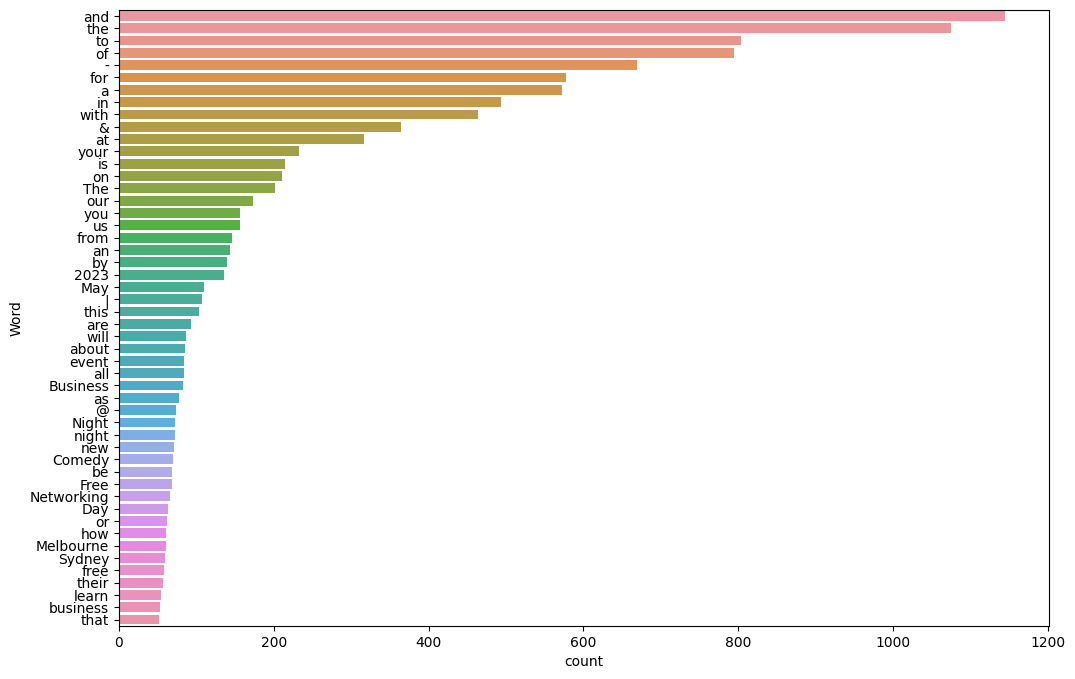

In [5]:
import seaborn as sns

def freq_words(x, terms = 30): 
  
  all_words = ' '.join([text for text in x]) 
  
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,8)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(df['description_combined'], 50)

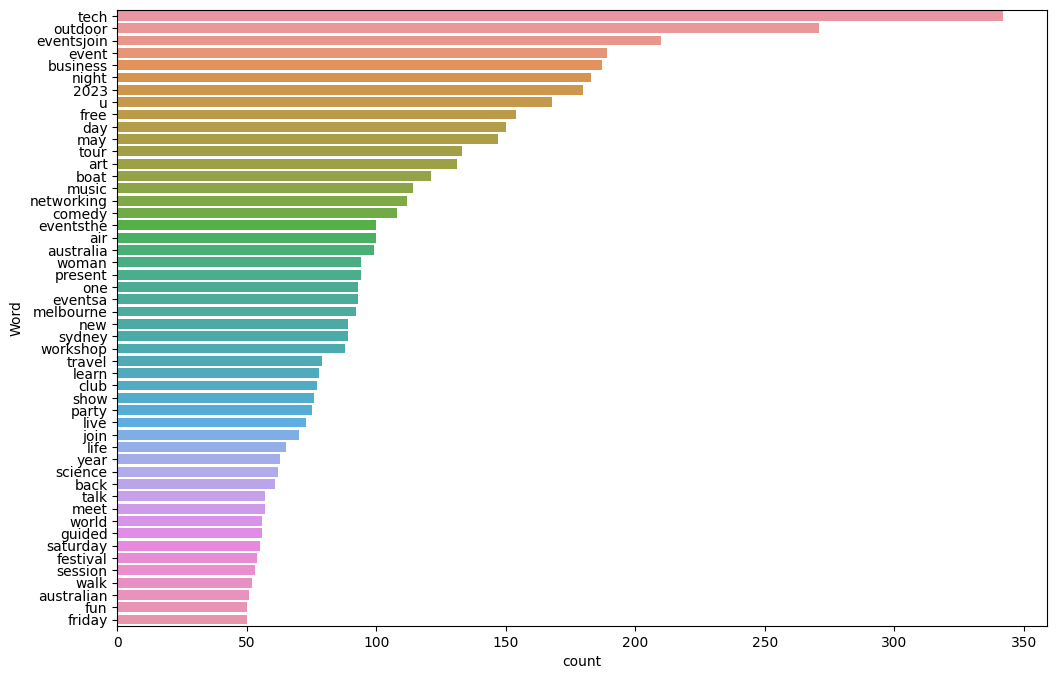

In [6]:
freq_words(df['description_clean'], 50)

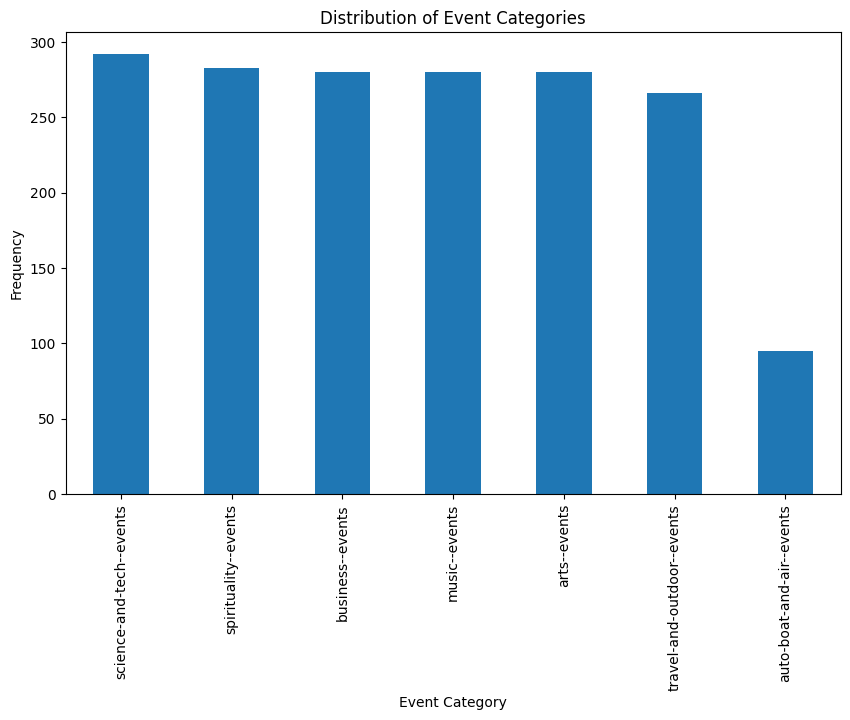

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is named 'df'
# Count the occurrences of each event category
category_counts = df['event_category'].value_counts()

# Create a bar plot of the event category distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Event Category')
plt.ylabel('Frequency')
plt.title('Distribution of Event Categories')
plt.show()

# Word2Vec

In [8]:
import spacy
spacy.load('en_core_web_sm')

nlp = spacy.load("en_core_web_sm")

def average_word_embeddings(text):
    doc = nlp(text)
    return sum(token.vector for token in doc) / len(doc)

df["word_embeddings"] = df["description_clean"].apply(average_word_embeddings)

In [9]:
df

,event_name,event_time,event_location,event_category,event_link,event_description,description_combined,description_clean,word_embeddings
1,"Digital Marketing, AI and Website Foundations ...","Tue, May 16, 9:30 AM","Wanneroo Civic Centre, Banksia Room 2 • Wanner...",business--events,https://www.eventbrite.com.au/e/digital-market...,Learn how to elevate your online presence and ...,"Digital Marketing, AI and Website Foundations ...",digital marketing ai website foundation small ...,"[-0.13986199, -0.58102494, 0.015013892, 0.0146..."
3,Thrive Together,"Fri, May 19, 11:00 AM + 2 more events",Work Tank Coworking & Serviced Offices • Niddr...,business--events,https://www.eventbrite.com.au/e/thrive-togethe...,Thrive Together - A monthly networking event e...,Thrive Togetherbusiness--eventsThrive Together...,thrive togetherbusiness eventsthrive together ...,"[-0.082189344, -0.4950982, -0.03403038, -0.130..."
5,UNSW Undergrad Pitch Competition and Social,"Wed, May 31, 4:00 PM","Michael Crouch Innovation Centre • Kensington,...",business--events,https://www.eventbrite.com.au/e/unsw-undergrad...,UNSW FOUNDERS UNDERGRAD PITCH SHOWCASE!,UNSW Undergrad Pitch Competition and Socialbus...,unsw undergrad pitch competition socialbusines...,"[-0.15499592, -0.8380272, -0.1471074, 0.162486..."
7,Build Your Own Business Promotional Strategy w...,Tomorrow at 9:30 AM,"Bizhub at Realm • Ringwood, VIC",business--events,https://www.eventbrite.com.au/e/build-your-own...,Join Social Media and Marketing Australia foun...,Build Your Own Business Promotional Strategy w...,build business promotional strategy jenn donov...,"[-0.08056287, -0.6628951, -0.099389754, 0.0650..."
9,Professional Selling Skills - How to Win the Sale,"Wed, May 24, 8:30 AM",Max Webber Library Function Centre • Blacktown...,business--events,https://www.eventbrite.com.au/e/professional-s...,Learn professional selling skills and strategi...,Professional Selling Skills - How to Win the S...,professional selling skill win salebusiness ev...,"[-0.037606034, -0.49109572, -0.01085212, -0.06..."
...,...,...,...,...,...,...,...,...,...
3549,Open Lab - Bonnyrigg: May 2023,"Sat, May 6, 2:00 PM + 11 more events","lab.LX STEAM, Bonnyrigg Library • Bonnyrigg, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/open-lab-bonny...,"Explore, test and create in OPEN LAB!",Open Lab - Bonnyrigg: May 2023science-and-tech...,open lab bonnyrigg may 2023science tech events...,"[-0.29990485, -0.743038, 0.2845101, -0.0605964..."
3551,Code Club: Python - Bonnyrigg,"Wed, May 3, 4:00 PM + 7 more events","lab.LX • Cabramatta, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/code-club-pyth...,Learn Python with lab.LX Code Club!,Code Club: Python - Bonnyriggscience-and-tech-...,code club python bonnyriggscience tech eventsl...,"[-0.43007576, -0.86232567, 0.18507013, 0.07224..."
3553,SciencePlay PD/PL for Primary and early second...,"Thu, Jun 8, 10:00 AM","SciencePlay Kids • Altona North, VIC",science-and-tech--events,https://www.eventbrite.com.au/e/scienceplay-pd...,We'll share some low-tech approaches to create...,SciencePlay PD/PL for Primary and early second...,scienceplay pd pl primary early secondary educ...,"[-0.07035951, -0.8014366, 0.2941729, 0.0064987..."
3555,Code Club: Scratch - Cabramatta,"Tue, May 2, 5:00 PM + 7 more events","Whitlam Library Cabramatta • Cabramatta, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/code-club-scra...,Begin your Code Club Australia Scratch journey...,Code Club: Scratch - Cabramattascience-and-tec...,code club scratch cabramattascience tech event...,"[-0.3502633, -0.9113446, 0.2652023, 0.14881077..."


In [10]:
df = df.reset_index(drop=True)
df['event_id'] = df.index
#  df['event_id'] = "event" + df['event_id'].astype(str)
df

,event_name,event_time,event_location,event_category,event_link,event_description,description_combined,description_clean,word_embeddings,event_id
0,"Digital Marketing, AI and Website Foundations ...","Tue, May 16, 9:30 AM","Wanneroo Civic Centre, Banksia Room 2 • Wanner...",business--events,https://www.eventbrite.com.au/e/digital-market...,Learn how to elevate your online presence and ...,"Digital Marketing, AI and Website Foundations ...",digital marketing ai website foundation small ...,"[-0.13986199, -0.58102494, 0.015013892, 0.0146...",0
1,Thrive Together,"Fri, May 19, 11:00 AM + 2 more events",Work Tank Coworking & Serviced Offices • Niddr...,business--events,https://www.eventbrite.com.au/e/thrive-togethe...,Thrive Together - A monthly networking event e...,Thrive Togetherbusiness--eventsThrive Together...,thrive togetherbusiness eventsthrive together ...,"[-0.082189344, -0.4950982, -0.03403038, -0.130...",1
2,UNSW Undergrad Pitch Competition and Social,"Wed, May 31, 4:00 PM","Michael Crouch Innovation Centre • Kensington,...",business--events,https://www.eventbrite.com.au/e/unsw-undergrad...,UNSW FOUNDERS UNDERGRAD PITCH SHOWCASE!,UNSW Undergrad Pitch Competition and Socialbus...,unsw undergrad pitch competition socialbusines...,"[-0.15499592, -0.8380272, -0.1471074, 0.162486...",2
3,Build Your Own Business Promotional Strategy w...,Tomorrow at 9:30 AM,"Bizhub at Realm • Ringwood, VIC",business--events,https://www.eventbrite.com.au/e/build-your-own...,Join Social Media and Marketing Australia foun...,Build Your Own Business Promotional Strategy w...,build business promotional strategy jenn donov...,"[-0.08056287, -0.6628951, -0.099389754, 0.0650...",3
4,Professional Selling Skills - How to Win the Sale,"Wed, May 24, 8:30 AM",Max Webber Library Function Centre • Blacktown...,business--events,https://www.eventbrite.com.au/e/professional-s...,Learn professional selling skills and strategi...,Professional Selling Skills - How to Win the S...,professional selling skill win salebusiness ev...,"[-0.037606034, -0.49109572, -0.01085212, -0.06...",4
...,...,...,...,...,...,...,...,...,...,...
1771,Open Lab - Bonnyrigg: May 2023,"Sat, May 6, 2:00 PM + 11 more events","lab.LX STEAM, Bonnyrigg Library • Bonnyrigg, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/open-lab-bonny...,"Explore, test and create in OPEN LAB!",Open Lab - Bonnyrigg: May 2023science-and-tech...,open lab bonnyrigg may 2023science tech events...,"[-0.29990485, -0.743038, 0.2845101, -0.0605964...",1771
1772,Code Club: Python - Bonnyrigg,"Wed, May 3, 4:00 PM + 7 more events","lab.LX • Cabramatta, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/code-club-pyth...,Learn Python with lab.LX Code Club!,Code Club: Python - Bonnyriggscience-and-tech-...,code club python bonnyriggscience tech eventsl...,"[-0.43007576, -0.86232567, 0.18507013, 0.07224...",1772
1773,SciencePlay PD/PL for Primary and early second...,"Thu, Jun 8, 10:00 AM","SciencePlay Kids • Altona North, VIC",science-and-tech--events,https://www.eventbrite.com.au/e/scienceplay-pd...,We'll share some low-tech approaches to create...,SciencePlay PD/PL for Primary and early second...,scienceplay pd pl primary early secondary educ...,"[-0.07035951, -0.8014366, 0.2941729, 0.0064987...",1773
1774,Code Club: Scratch - Cabramatta,"Tue, May 2, 5:00 PM + 7 more events","Whitlam Library Cabramatta • Cabramatta, NSW",science-and-tech--events,https://www.eventbrite.com.au/e/code-club-scra...,Begin your Code Club Australia Scratch journey...,Code Club: Scratch - Cabramattascience-and-tec...,code club scratch cabramattascience tech event...,"[-0.3502633, -0.9113446, 0.2652023, 0.14881077...",1774


In [11]:
df['description_clean'][0]

'digital marketing ai website foundation small businessbusiness eventslearn elevate online presence reach ideal customer effective digital marketing ai strategy'

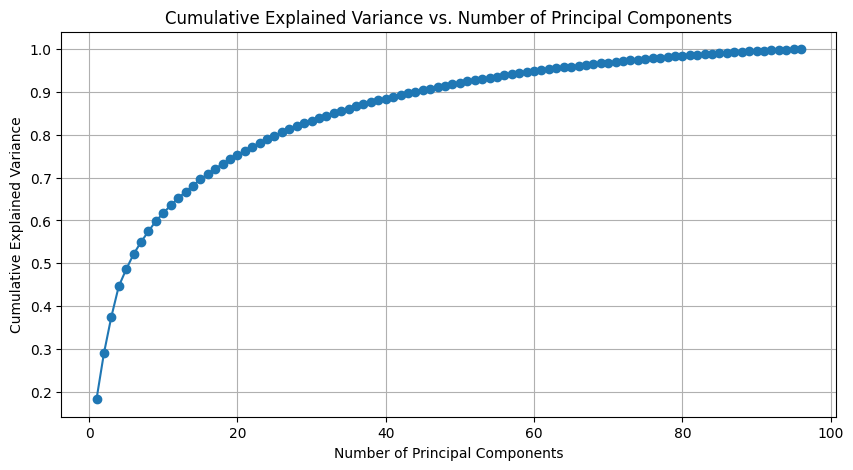

Number of dimensions for 95.0% explained variance: 61


In [12]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have a matrix of word embeddings called 'embeddings_matrix'
embeddings_matrix = np.stack(df['word_embeddings'])

# Apply PCA
pca = PCA()
pca.fit(embeddings_matrix)

# Calculate the explained variance ratio and the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

# Find the number of dimensions that account for a certain amount of variance, e.g., 95%
target_variance = 0.95
num_dimensions = np.argmax(cumulative_explained_variance >= target_variance) + 1
print(f"Number of dimensions for {target_variance * 100}% explained variance: {num_dimensions}")


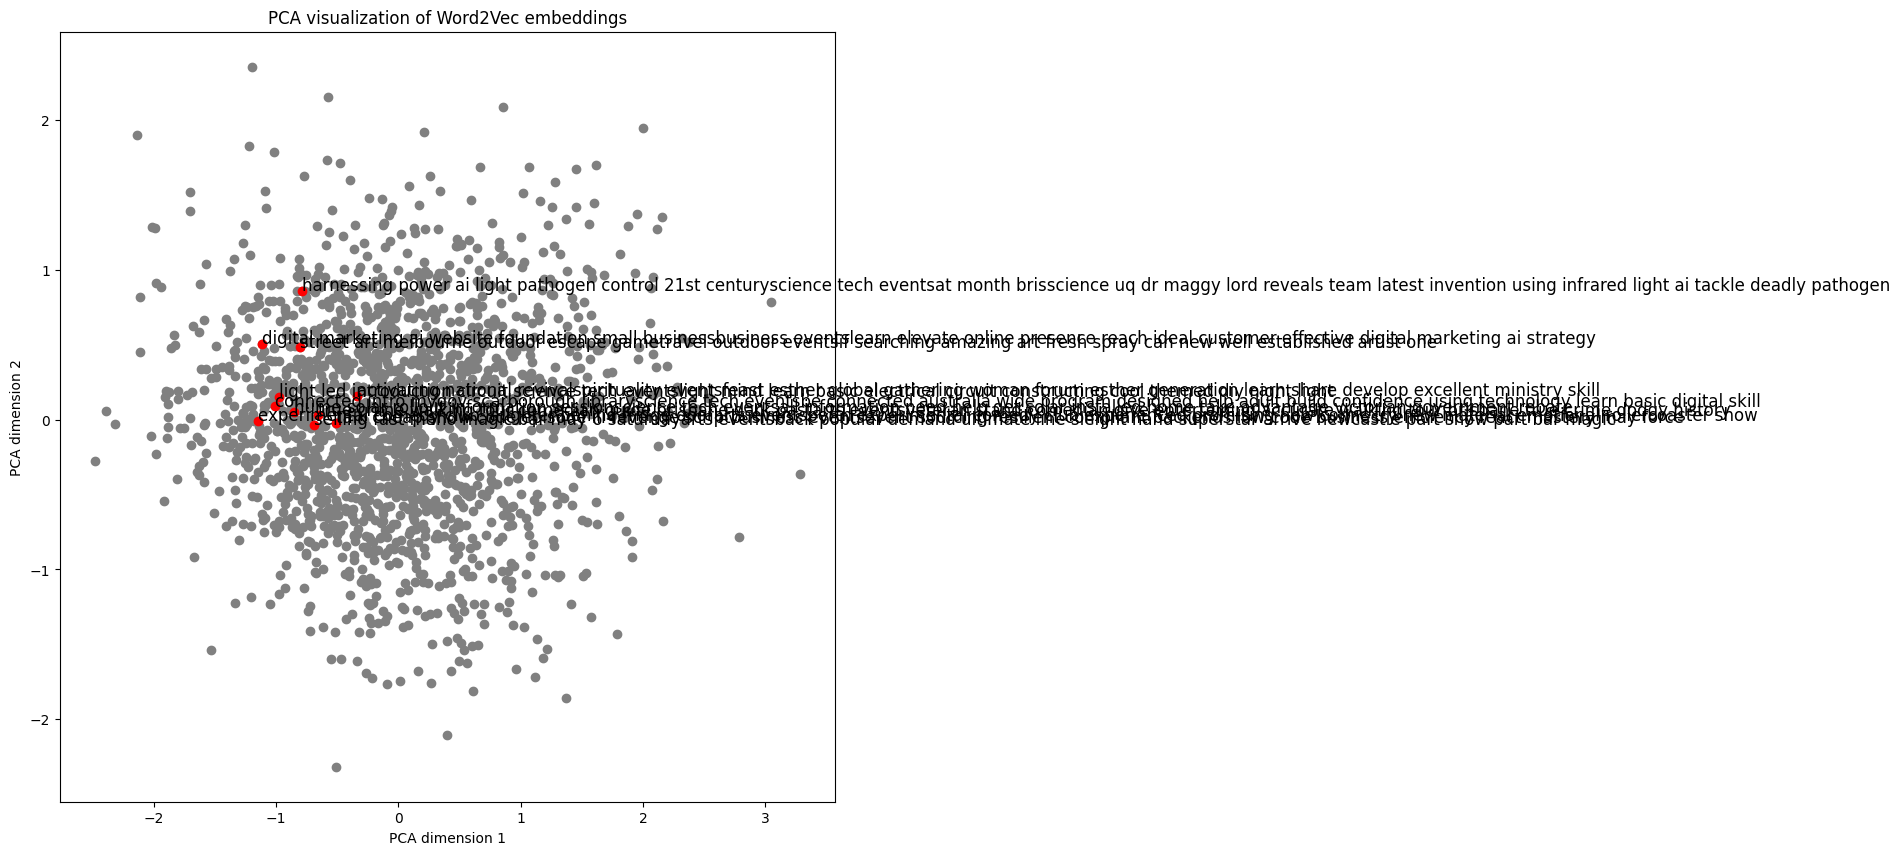

In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Your input word
input_word = "example1"

# Apply PCA to the word embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(np.stack(df['word_embeddings']))

# Find the 10 closest words
input_embedding = df.loc[df['description_clean'] == df['description_clean'][0], 'word_embeddings'].iloc[0]
similarity_scores = cosine_similarity([input_embedding], np.stack(df['word_embeddings']))[0]
closest_indices = similarity_scores.argsort()[-11:][::-1]

# Create a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], color='gray')

# Highlight and annotate the input word and its 10 closest words
highlighted_embeddings = reduced_embeddings[closest_indices]
plt.scatter(highlighted_embeddings[:, 0], highlighted_embeddings[:, 1], color='red')

for idx in closest_indices:
    word = df.iloc[idx]['description_clean']
    plt.annotate(word, xy=(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1]), fontsize=12)

plt.xlabel("PCA dimension 1")
plt.ylabel("PCA dimension 2")
plt.title("PCA visualization of Word2Vec embeddings")
plt.show()


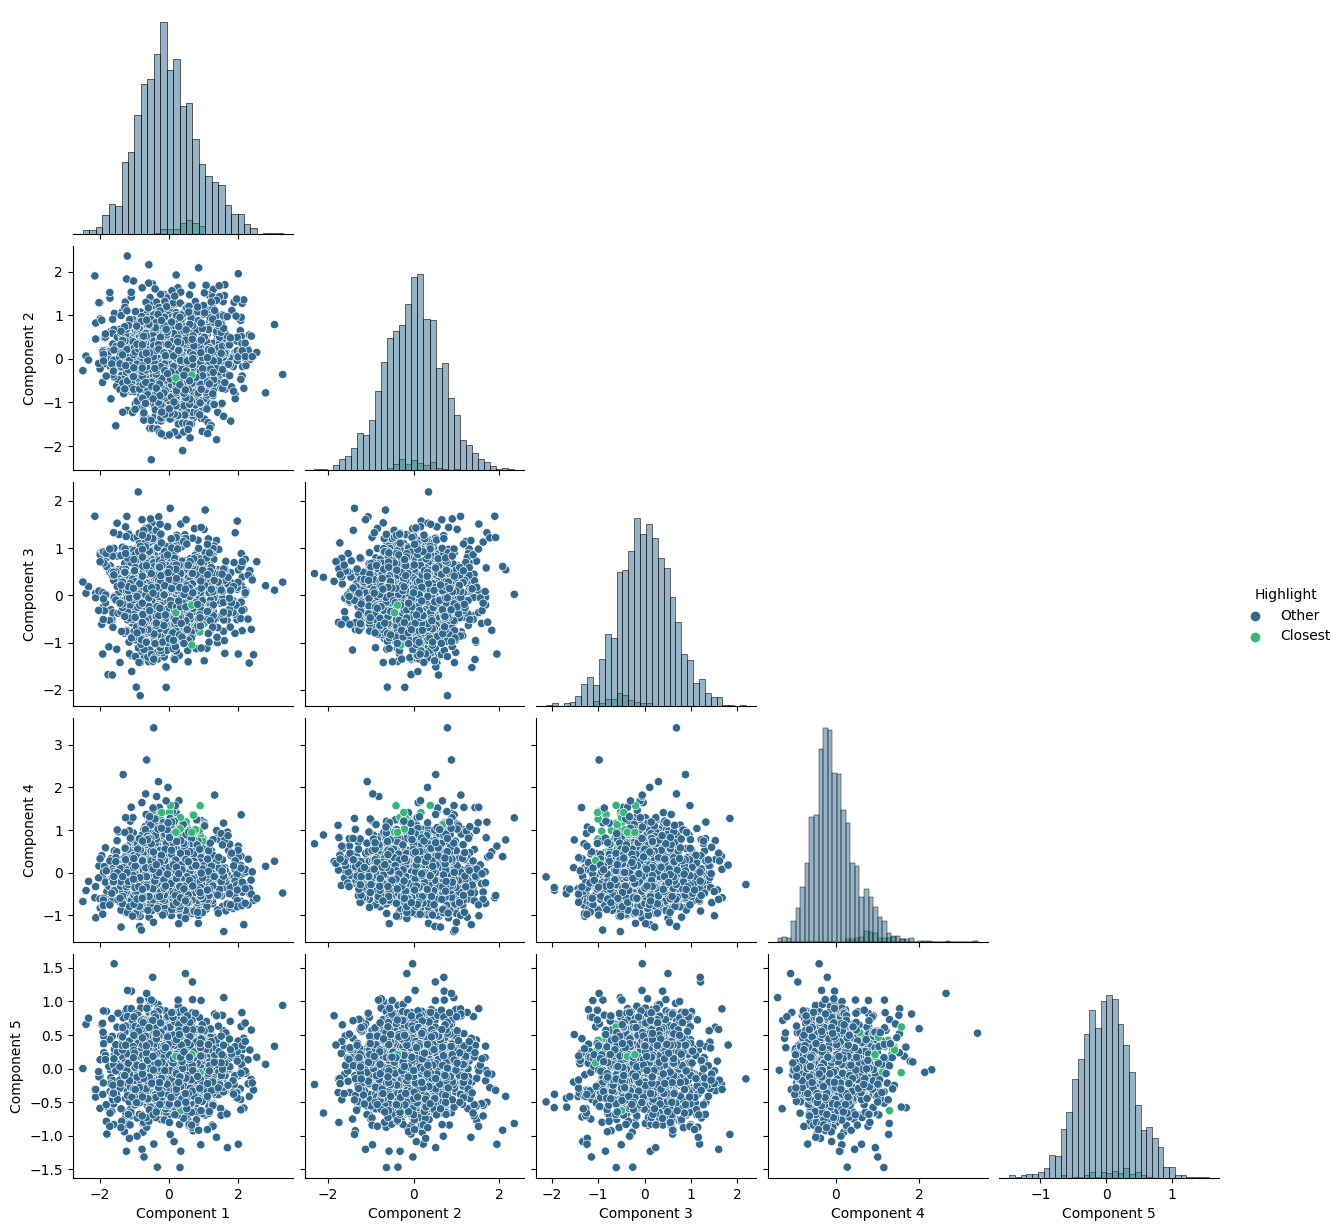

In [32]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt

# Your input word and number of closest words
num_closest_words = 50
pca_count = 5

# Assuming you have a DataFrame called 'df' containing the word embeddings
embeddings_matrix = np.stack(df['word_embeddings'])
words = df['description_clean']

# Apply PCA with 5 components
pca = PCA(n_components=pca_count)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

# Find the index of the input word
input_word_index = np.where(words == df['description_clean'][20])[0][0]

# Calculate the Euclidean distances between the input word and all other words
distances = euclidean_distances(reduced_embeddings[input_word_index].reshape(1, -1), reduced_embeddings)
distances_sorted_indices = np.argsort(distances.flatten())

# Get the indices of the 10 closest words
closest_words_indices = distances_sorted_indices[:num_closest_words]

# Create a new DataFrame with the PCA results and word labels
pca_df = pd.DataFrame(reduced_embeddings, columns=[f'Component {i+1}' for i in range(pca_count)], index=words)
pca_df['Highlight'] = 'Other'
pca_df.loc[words[closest_words_indices], 'Highlight'] = 'Closest'

# Create a scatter plot matrix with color map based on the 'Highlight' column
sns.pairplot(pca_df, hue='Highlight', corner=True, diag_kind="hist", palette="viridis")
plt.show()


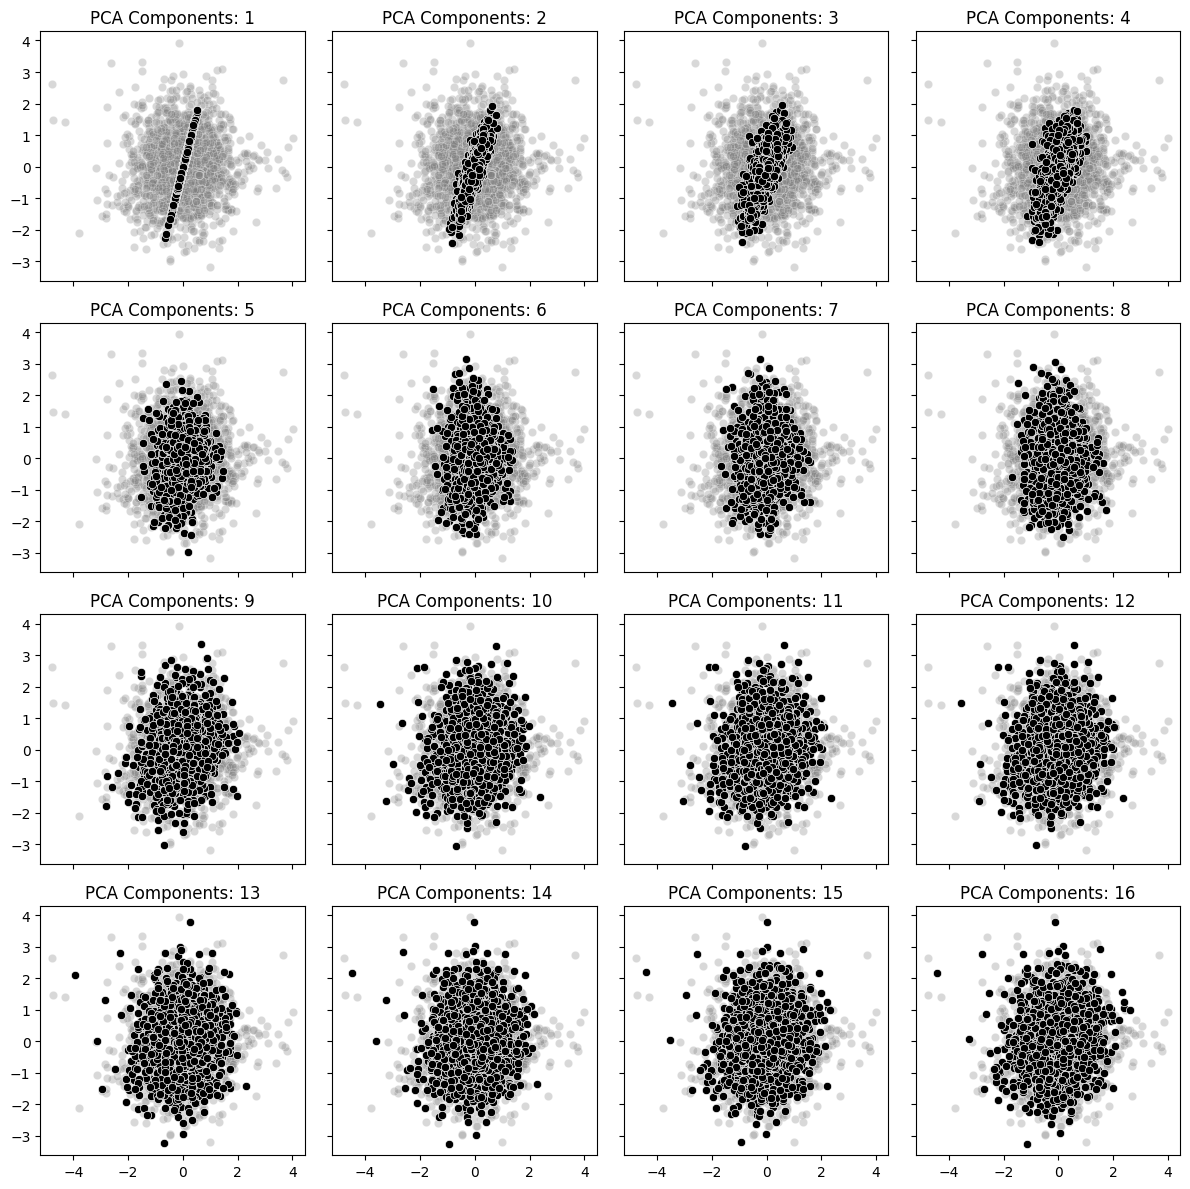

In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

def transform_pca(X, n):
    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))
    return X_new

# Assuming you have a DataFrame called 'df' containing the word embeddings
embeddings_matrix = np.stack(df['word_embeddings'])

rows = 4
cols = 4
comps = 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(embeddings_matrix)

fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12, 12), 
                         sharex=True, 
                         sharey=True)

for row in range(rows):
    for col in range(cols):
        try:
            X_new = transform_pca(X_scaled, comps)
            ax = sns.scatterplot(x=X_scaled[:, 0], 
                                 y=X_scaled[:, 1], 
                                 ax=axes[row, col], 
                                 color='grey', 
                                 alpha=.3)
            ax = sns.scatterplot(x=X_new[:, 0], 
                                 y=X_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='black')
            ax.set_title(f'PCA Components: {comps}')
            comps += 1
        except:
            pass

plt.tight_layout()
plt.savefig('pcavisualize_2.png', dpi=300)
plt.show()

Total number of words: 29693
Number of unique words: 7579
Average word length: 6.64


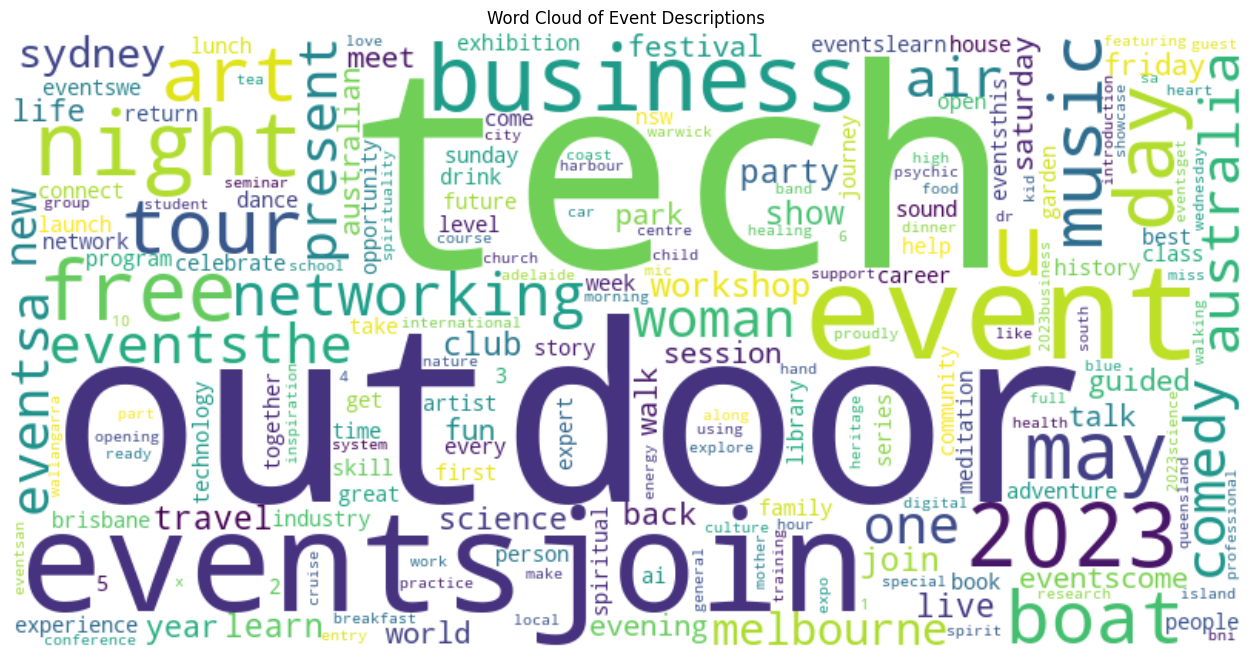

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Assuming the DataFrame is named 'df'

# Combine all the text in the description_clean column
all_text = ' '.join(df['description_clean'])

# Split the text into individual words
words = all_text.split()

# Calculate the average word length
average_word_length = sum(len(word) for word in words) / len(words)

# Count the occurrences of each word
word_counts = Counter(words)

# Print descriptive statistics
print(f"Total number of words: {len(words)}")
print(f"Number of unique words: {len(word_counts)}")
print(f"Average word length: {average_word_length:.2f}")

# Create a word cloud visualization of the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Event Descriptions')
plt.show()


# Reccommender system 

## User/Collaborative filering

In [38]:
df.event_category.unique()

array(['business--events', 'travel-and-outdoor--events', 'music--events',
       'arts--events', 'auto-boat-and-air--events',
       'spirituality--events', 'science-and-tech--events'], dtype=object)

In [114]:
df[df.event_category == 'science-and-tech--events'].head(5)

,event_name,event_time,event_location,event_category,event_link,event_description,description_combined,description_clean,word_embeddings,event_id
1444,Women in Tech Global Conference 2023,"Tue, May 9, 2023 11:00 PM AEST",NaN,science-and-tech--events,https://www.eventbrite.com/e/women-in-tech-glo...,Unite 100 000 Women in Tech to Drive Change wi...,Women in Tech Global Conference 2023science-an...,woman tech global conference 2023science tech ...,"[-0.022256505, -0.8722332, 0.14567772, 0.29059...",1444
1445,Future-Ready Grid – A Conversation with WA Ene...,"Tue, May 9, 12:30 PM","Parmelia Hilton Perth • PERTH, WA",science-and-tech--events,https://www.eventbrite.com.au/e/future-ready-g...,AIE Perth is pleased to host Hon Bill Johnston...,Future-Ready Grid – A Conversation with WA Ene...,future ready grid conversation wa energy minis...,"[-0.096285865, -0.5672075, 0.08052449, 0.08954...",1445
1446,Tindo Solar and Tesla VIP Experience,NaN,"Tindo Solar • Mawson Lakes, SA",science-and-tech--events,https://www.eventbrite.com/e/tindo-solar-and-t...,Join us for a hands-on experience where you ca...,Tindo Solar and Tesla VIP Experiencescience-an...,tindo solar tesla vip experiencescience tech e...,"[-0.096983105, -0.81969965, 0.37456334, 0.0572...",1446
1447,Emerging TECH - An afternoon of AI & Chat GPT ...,Today at 2:00 PM,"386 Smith St • Collingwood, VIC",science-and-tech--events,https://www.eventbrite.com/e/emerging-tech-an-...,An interactive and social afternoon where we e...,Emerging TECH - An afternoon of AI & Chat GPT ...,emerging tech afternoon ai chat gpt sunday 30t...,"[-0.035812583, -0.79982996, 0.083026454, 0.103...",1447
1448,Sustainability in Space Pitch Competition,"Thu, May 4, 8:30 AM","The Precinct • Fortitude Valley, QLD",science-and-tech--events,https://www.eventbrite.co.uk/e/sustainability-...,We're excited to invite you Aerospace Xelerate...,Sustainability in Space Pitch Competitionscien...,sustainability space pitch competitionscience ...,"[-0.20226586, -0.609504, 0.16121271, 0.0112673...",1448


In [190]:
# Create fake user data.

# User 1 - like buisness 
# User 2 - like travel and outdoor
# User 3 - Like music
user_data = {
    'user1': [(1, 5), (2, 5), (338, 5),(337, 5), (336, 5), (335, 5),
				(250, 1), (251, 1), (252, 1),(253, 1), (255, 1), (255, 1),
				(556, 1), (557, 1), (558, 1),(559, 1), (550, 1), (551, 1),
				(826, 1), (831, 1), (827, 1),(828, 1), (829, 1), (830, 1),
				(1107, 1), (1108, 1), (1109, 1),(1110, 1), (1111, 1), (1112, 1),
				(1201, 1), (1202, 1), (1203, 1),(1205, 1), (1205, 1), (1206, 1),
				(1555, 1), (1555, 1), (1556, 1),(1558, 1), (1559, 1), (1550, 1)],
    'user2': [(1, 1), (2, 1), (338, 1),(337, 1), (336, 1), (335, 1),
				(250, 5), (251, 5), (252,5),(253, 5), (255, 5), (255, 5),
				(556, 1), (557, 1), (558, 1),(559, 1), (550, 1), (551, 1),
				(826, 1), (831, 1), (827, 1),(828, 1), (829, 1), (830, 1),
				(1107, 1), (1108, 1), (1109, 1),(1110, 1), (1111, 1), (1112, 1),
				(1201, 1), (1202, 1), (1203, 1),(1205, 1), (1205, 1), (1206, 1),
				(1555, 1), (1555, 1), (1556, 1),(1558, 1), (1559, 1), (1550, 1)],
    'user3': [(1, 1), (2, 1), (338, 1),(337, 1), (336, 1), (335, 1),
				(250, 1), (251, 1), (252, 1),(253, 1), (255, 1), (255, 1),
				(556, 5), (557, 5), (558, 5),(559, 5), (550, 5), (551, 5),
				(826, 1), (831, 1), (827, 1),(828, 1), (829, 1), (830, 1),
				(1107, 1), (1108, 1), (1109, 1),(1110, 1), (1111, 1), (1112, 1),
				(1201, 1), (1202, 1), (1203, 1),(1205, 1), (1205, 1), (1206, 1),
				(1555, 1), (1555, 1), (1556, 1),(1558, 1), (1559, 1), (1550, 1)],
    'user4': [(1, 1), (2, 1), (338, 1),(337, 1), (336, 1), (335, 1),
				(250, 1), (251, 1), (252, 1),(253, 1), (255, 1), (255, 1),
				(556, 1), (557, 1), (558, 1),(559, 1), (550, 1), (551, 1),
				(826, 5), (831, 5), (827, 5),(828, 5), (829, 5), (830, 5),
				(1107, 1), (1108, 1), (1109, 1),(1110, 1), (1111, 1), (1112, 1),
				(1201, 1), (1202, 1), (1203, 1),(1205, 1), (1205, 1), (1206, 1),
				(1555, 1), (1555, 1), (1556, 1),(1558, 1), (1559, 1), (1550, 1)],
    'user5': [(1, 1), (2, 1), (338, 1),(337, 1), (336, 1), (335, 1),
				(250, 1), (251, 1), (252, 1),(253, 1), (255, 1), (255, 1),
				(556, 1), (557, 1), (558, 1),(559, 1), (550, 1), (551, 1),
				(826, 1), (831, 1), (827, 1),(828, 1), (829, 1), (830, 1),
				(1107, 5), (1108, 5), (1109, 5),(1110, 5), (1111, 5), (1112, 5),
				(1201, 1), (1202, 1), (1203, 1),(1205, 1), (1205, 1), (1206, 1),
				(1555, 1), (1555, 1), (1556, 1),(1558, 1), (1559, 1), (1550, 1)],
    'user6': [(1, 1), (2, 1), (338, 1),(337, 1), (336, 1), (335, 1),
				(250, 1), (251, 1), (252, 1),(253, 1), (255, 1), (255, 1),
				(556, 1), (557, 1), (558, 1),(559, 1), (550, 1), (551, 1),
				(826, 1), (831, 1), (827, 1),(828, 1), (829, 1), (830, 1),
				(1107, 1), (1108, 1), (1109, 1),(1110, 1), (1111, 1), (1112, 1),
				(1201, 5), (1202, 5), (1203, 5),(1205, 5), (1205, 5), (1206, 5),
				(1555, 1), (1555, 1), (1556, 1),(1558, 1), (1559, 1), (1550, 1)],
    'user7': [(1, 1), (2, 1), (338, 1),(337, 1), (336, 1), (335, 1),
				(250, 1), (251, 1), (252, 1),(253, 1), (255, 1), (255, 1),
				(556, 1), (557, 1), (558, 1),(559, 1), (550, 1), (551, 1),
				(826, 1), (831, 1), (827, 1),(828, 1), (829, 1), (830, 1),
				(1107, 1), (1108, 1), (1109, 1),(1110, 1), (1111, 1), (1112, 1),
				(1201, 1), (1202, 1), (1203, 1),(1205, 1), (1205, 1), (1206, 1),
				(1555, 5), (1555, 5), (1556, 5),(1558, 5), (1559, 5), (1550, 5)]
}

# Make a simple dictionary with what the user preference is to evaluate user perfomance
user_data_catagory_preferences = {
    'user1':'business--events',
    'user2':'travel-and-outdoor--events',
    'user3':'bmusic--events',
    'user4':'arts--events',
    'user5':'auto-boat-and-air--events',
    'user6':'spirituality--events',
    'user7':'science-and-tech--events',
}

In [135]:
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import cross_validate, GridSearchCV

# Convert user data to a DataFrame
user_data_list = [(user, event, rating) for user, events in user_data.items() for event, rating in events]
user_data_df = pd.DataFrame(user_data_list, columns=['user_id', 'event_id', 'rating'])

# Create a Reader and Dataset for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_data_df[['user_id', 'event_id', 'rating']], reader)

# Define hyperparameter search space
param_grid = {
    'k': [ 5, 7, 10, 20, 40, 60],
    'sim_options': {
        'name': ['msd', 'cosine', 'pearson'],
        'user_based': [True, False]
    }
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5)
grid_search.fit(data)

# Print the best hyperparameters and their corresponding RMSE and MAE scores
print("Best hyperparameters: ", grid_search.best_params)
print("Best RMSE score: ", grid_search.best_score['rmse'])
print("Best MAE score: ", grid_search.best_score['mae'])

# Create a new KNNBasic model with the best hyperparameters
best_params = grid_search.best_params['rmse']
algo = KNNBasic(k=best_params['k'], sim_options=best_params['sim_options'])

# Train the KNNBasic model on the full dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...


## Content based filtering

In [186]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix
cosine_similarity_matrix = cosine_similarity(np.stack(df['word_embeddings'].values))

# Map event IDs to indices and vice versa
event_ids = df['event_id'].tolist()
event_id_to_index = {event_id: idx for idx, event_id in enumerate(event_ids)}
index_to_event_id = {idx: event_id for idx, event_id in enumerate(event_ids)}

def hybrid_recommendations(user_id, event_id, event_id_to_index, cosine_similarity_matrix):
    # Get content-based similarity scores
    event_index = event_id_to_index[event_id]
    similarity_scores = cosine_similarity_matrix[event_index]

    # Get collaborative filtering predictions
    user_event_data = Dataset.load_from_df(user_data_df[['user_id', 'event_id', 'rating']], reader).build_full_trainset()
    algo.fit(user_event_data)
    cf_predictions = [algo.predict(user_id, event_id).est for event_id in event_ids]

    # Combine content-based similarity scores with collaborative filtering predictions
    hybrid_scores = [sim * cf_pred for sim, cf_pred in zip(similarity_scores, cf_predictions)]

    # Get top N recommendations
    N = 10
    top_indices = np.argsort(hybrid_scores)[-N:]
    top_event_ids = [event_ids[i] for i in top_indices]

    return top_event_ids

# Example usage
user_id = 'user6'
event_id = 50
recommendations = hybrid_recommendations(user_id, event_id, event_id_to_index, cosine_similarity_matrix)
print(recommendations)
print(f"event {event_id} : Name : {df.event_name[event_id]}  Name : {df.event_category[event_id]}")
for i in recommendations:
    print(df.event_category[i])
    print("   "   + df.event_name[i])


Computing the pearson similarity matrix...
Done computing similarity matrix.
[191, 142, 1537, 72, 50, 1206, 1205, 1203, 1202, 1201]
event 50 : Name : StartSpace Tours  Name : business--events
business--events
   Sydney Warehouse Anniversary
business--events
   CyRise Accelerator Demo Day
science-and-tech--events
   CIT ICT/Cyber Security Student Pathways Event
business--events
   WA | Victoria Park | Property Investment Education Event
business--events
   StartSpace Tours
spirituality--events
   Soul Expression | Cacao Ceremony + Pranayama + Ecstatic Dance
spirituality--events
   Wine & Spirits - An Afternoon with Michelle DeAngelis
spirituality--events
   Satsang by Aptaputra in Perth
spirituality--events
   Epiclesis Retreat - Hobart
spirituality--events
   Buddhist Temple Visit.


In [231]:
import random
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD

# User preferences

# Create a Reader and Dataset for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_data_df[['user_id', 'event_id', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.40)

# Create a new KNNBasic model with the best hyperparameters
algo = KNNBasic(k=5, sim_options=best_params['sim_options'])

# Train the KNNBasic model on the dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

# Generate predictions on the testset
predictions = algo.test(testset)

# Calculate the proportion of recommended events with the same category as the input event
correct_recommendations = 0
total_recommendations = 0

for user_id, event_id, true_rating, est_rating, _ in predictions:
    # Get content-based similarity scores
    event_index = event_id_to_index[event_id]
    similarity_scores = cosine_similarity_matrix[event_index]

    # Get top-k similar events
    k = 5
    top_k_indices = np.argsort(similarity_scores)[-k:]
    top_k_event_ids = [index_to_event_id[i] for i in top_k_indices]
    input_event_category = df.iloc[event_id]['event_category']
        

    for rec_event_id in top_k_event_ids:
        recommended_event_category = df.iloc[rec_event_id]['event_category']
        recommended_user_category = user_data_catagory_preferences[user_id]
        if input_event_category == recommended_event_category or input_event_category == recommended_user_category:
            correct_recommendations += 1

    total_recommendations += k

# Calculate the accuracy of the hybrid system
accuracy = correct_recommendations / total_recommendations
print(f'Accuracy: {accuracy:.4f}')


Computing the pearson similarity matrix...
Done computing similarity matrix.
Accuracy: 0.5441
